In [47]:
import os
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: C:\Users\Keval Shah\My Python Stuff


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("breast_cancer_survival.csv")

In [50]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [51]:
df.shape

(334, 15)

In [52]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [53]:
df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [54]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

Age                   0.000000
Gender                0.000000
Protein1              0.000000
Protein2              0.000000
Protein3              0.000000
Protein4              0.000000
Tumour_Stage          0.000000
Histology             0.000000
ER status             0.000000
PR status             0.000000
HER2 status           0.000000
Surgery_type          0.000000
Date_of_Surgery       0.000000
Date_of_Last_Visit    5.089820
Patient_Status        3.892216
dtype: float64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [56]:
# Need to handle Duplicates
dup_ent = df[df.duplicated()]
dup_ent

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status


so we have no duplicate rows 

In [57]:
# just to check lol
search_value = 'Male'

column_name = 'Gender'

filtered_rows = df[df[column_name] == search_value]
filtered_rows

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status


# Visualizations

In [58]:
first_stage = df.loc[df['Tumour_Stage'] == 'I'].count()[0] 
second_stage = df.loc[df['Tumour_Stage'] == 'II'].count()[0] 
third_stage = df.loc[df['Tumour_Stage'] == 'III'].count()[0] 

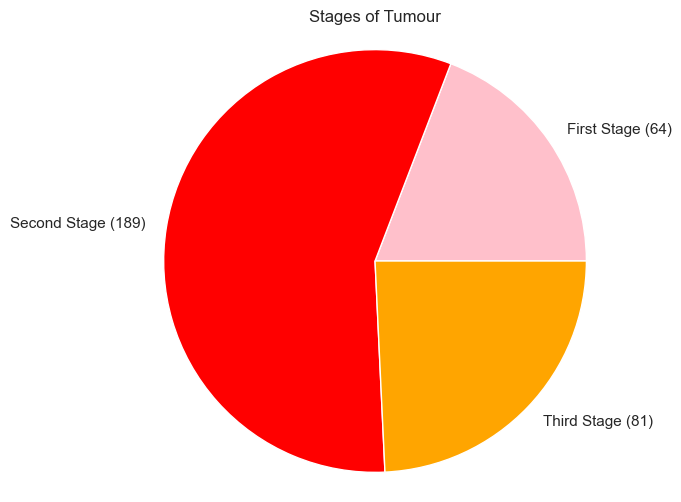

In [59]:
plt.figure(figsize=(6, 6))
labels = [f'First Stage ({first_stage})', f'Second Stage ({second_stage})', f'Third Stage ({third_stage})']
colors = ['pink', 'red', 'orange']

plt.pie([first_stage, second_stage, third_stage], labels=labels, colors=colors)
plt.axis('equal')
plt.title('Stages of Tumour')

plt.show()


In [60]:
df.value_counts("Tumour_Stage")

Tumour_Stage
II     189
III     81
I       64
dtype: int64

In [61]:
# Make a historgram of counts of people with different Tumor Stages

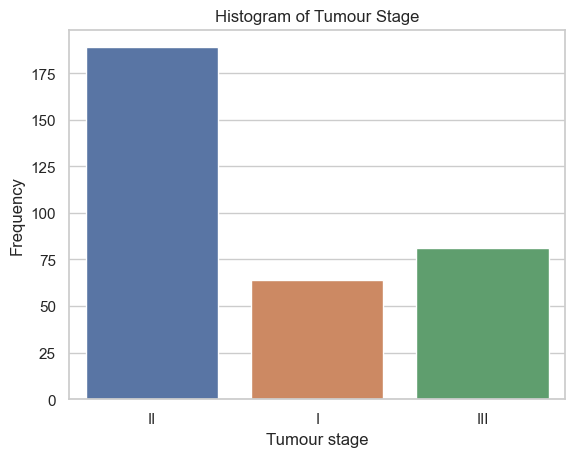

In [62]:
sns.countplot(data=df, x='Tumour_Stage')
plt.title('Histogram of Tumour Stage')
plt.xlabel('Tumour stage')
plt.ylabel('Frequency')
plt.show()


In [63]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [64]:
new_column_name = 'Target'
df.rename(columns={'Patient_Status': new_column_name}, inplace=True)
target_values = df['Target']

print(target_values)


0      Alive
1       Dead
2      Alive
3      Alive
4      Alive
       ...  
329    Alive
330    Alive
331     Dead
332    Alive
333     Dead
Name: Target, Length: 334, dtype: object


In [65]:
df['Target'] = df['Target'].replace({'Dead': 0, 'Alive': 1})
count = df['Target'].value_counts()
print(count)

1.0    255
0.0     66
Name: Target, dtype: int64


# This depicts 255 people were Alive and 66 died after surgery

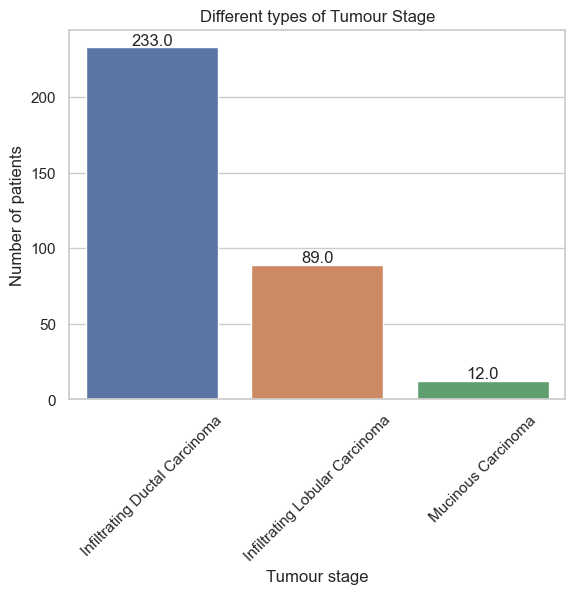

<Figure size 2000x2000 with 0 Axes>

In [66]:
ax = sns.countplot(data=df, x='Histology')
plt.title('Different types of Tumour Stage')
plt.xlabel('Tumour stage')
plt.ylabel('Number of patients')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

plt.show()

Thus numerous patients suffered from Infiltrating Ductal Carcinoma while patients suffering from Infiltrating Lobular Carcinoma are moderate and those suffering from Mucinous Carcinoma are minimum

In [67]:
freq_surgery = df['Surgery_type'].value_counts()
freq_surgery

Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: Surgery_type, dtype: int64

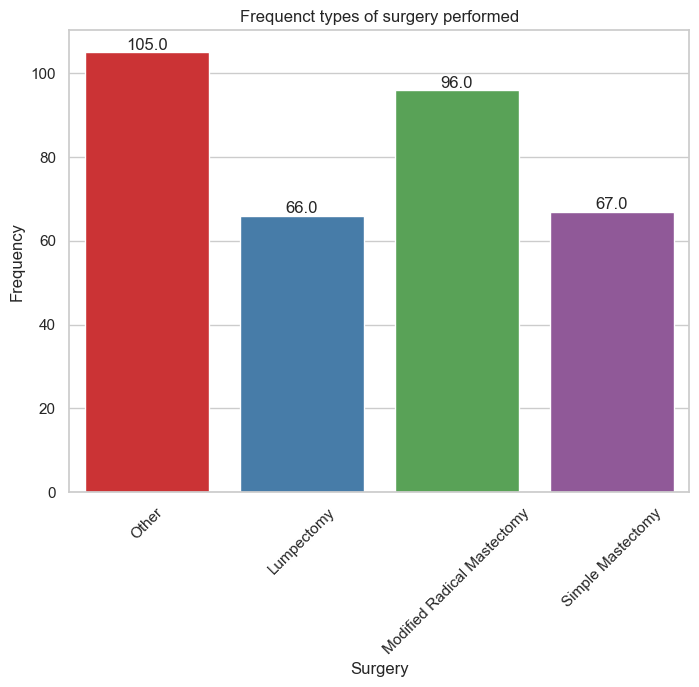

In [68]:
plt.figure(figsize=(8, 6))
ay = sns.countplot(data=df, x='Surgery_type', palette='Set1')

plt.title('Frequenct types of surgery performed')
plt.xlabel('Surgery')
plt.ylabel('Frequency')

plt.xticks(rotation=45)
for p in ay.patches:
    ay.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.show()

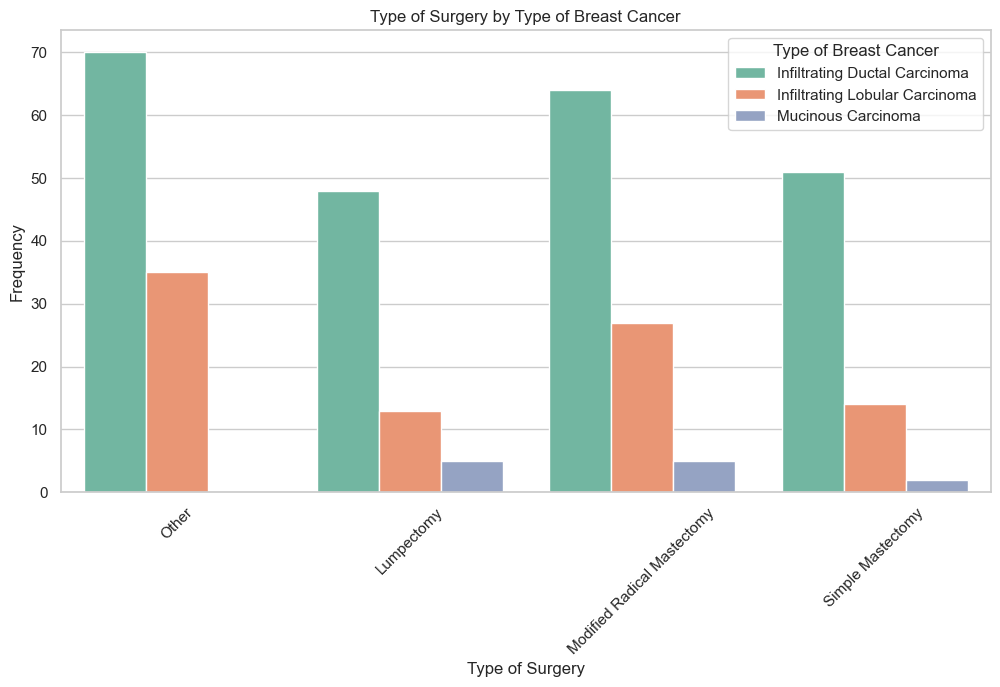

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Surgery_type', hue='Histology', palette='Set2')
plt.title('Type of Surgery by Type of Breast Cancer')
plt.xlabel('Type of Surgery')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Type of Breast Cancer')
plt.show()


In [77]:
hist_count = df['Histology'].value_counts()
hist_count

Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

In [72]:
cols=["Age","Protein1","Protein2","Protein3"]
for i in cols:
    print(f"Skewness {i} : " + str(df[i].skew()))

Skewness Age : 0.3041337225108598
Skewness Protein1 : -0.6130210496174383
Skewness Protein2 : -0.19915843900218547
Skewness Protein3 : 0.7011036269606915


In [73]:
corr=df.corr()

C:\Users\Keval Shah\AppData\Local\Temp\ipykernel_18048\1726683880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

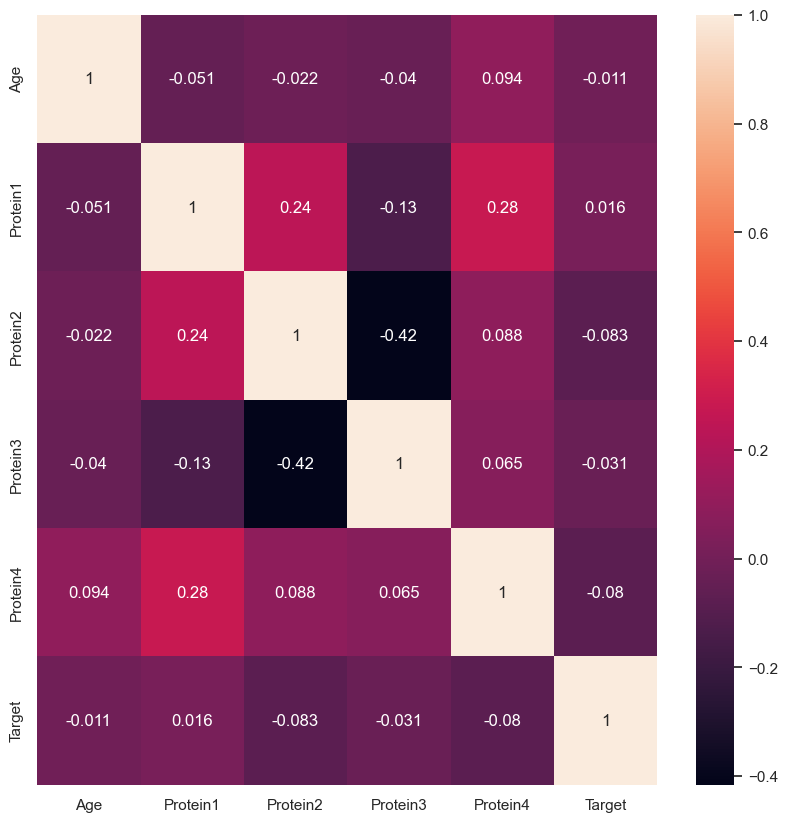

In [74]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)